In [1]:
import os
import sys
# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../src"))

In [2]:
#import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from visualization import (
    plot_views_distribution,
    plot_messages_over_time,
    plot_messages_by_day,
    plot_messages_by_hour,
    plot_messages_with_media,
    plot_correlation_matrix
)
from db_operations import connect_to_db, close_connection, read_data_from_table
from logging_utils import setup_logger
# Set up logging
logger = setup_logger(name='my_logger', log_file='logs/my_log.log')
logger.info("Starting EDA process...")


In [3]:
# Specify the table name
table_name = 'telegram_messages'

# Fetch data from the table
df = read_data_from_table(table_name)
logger.info("Data loaded successfully.")



Connected to the database successfully!
Executing query: SELECT * FROM telegram_messages
Data read from table 'telegram_messages' successfully!
Database connection closed.


d:\Kifya_training\Week 7\EthioMart-Amharic-NER-System\src\db_operations.py:40: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)  # Pass the string query to pandas


In [4]:
# Display the first few rows of the DataFrame
logger.info("Displaying the first 5 rows of the dataset:")
display(df.head())

# Get basic information about the dataset
logger.info("Dataset info:")
df.info()

# Check for missing values
logger.info("Missing values in the dataset:")
display(df.isnull().sum())

# Get basic statistics for numerical columns
logger.info("Basic statistics for numerical columns:")
display(df.describe())

,id,date,message,views,media
0,97,2023-02-10 12:23:06,"⚠️Notice!\nDear esteemed customers,\nDue to fo...",1047.0,True
1,96,2023-02-02 08:58:52,Mela-One በውስጡ ሆርሞን ያለው ድንገተኛ ወሊድ መቆጣጠርያ ሲሆን ያለ...,1013.0,True
2,95,2023-02-01 08:59:37,አዚትሮማይሲን በሃኪም መድሃኒት ማዘዣ ከሚታዘዙ አንቲባዮቲኮች አንዱ ሲሆን...,920.0,True
3,94,2023-01-31 09:19:53,Che-Med Trivia #3\n\nምግብና መጠጦች አንዳንድ መድሃኒቶች በደ...,712.0,True
4,93,2023-01-30 09:45:25,"Che-Med Trivia #2\n\nእንደ Ciprofloxacin, Doxycy...",620.0,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       476 non-null    int64         
 1   date     476 non-null    datetime64[ns]
 2   message  476 non-null    object        
 3   views    437 non-null    float64       
 4   media    476 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 15.5+ KB


id          0
date        0
message     0
views      39
media       0
dtype: int64

,id,date,views
count,476.000000,476,437.000000
mean,4121.949580,2024-01-29 10:14:05.481092608,5529.727689
min,1.000000,2022-02-05 04:59:06,194.000000
25%,792.750000,2022-11-15 07:34:26,721.000000
50%,1209.500000,2024-11-14 04:50:51,2123.000000
75%,2578.250000,2025-01-19 09:35:38.500000,10527.000000
max,15096.000000,2025-01-27 11:01:51,36029.000000
std,5693.602041,NaN,7059.784943


In [5]:
# Fill missing values in the 'views' column with the median
df['views'] = df['views'].fillna(df['views'].median())

# Verify that there are no more missing values
logger.info("Missing values after filling:")
display(df.isnull().sum())

id         0
date       0
message    0
views      0
media      0
dtype: int64

In [6]:
# Extract date-related features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Display the first few rows to verify
logger.info("Date-related features added:")
display(df.head())

,id,date,message,views,media,year,month,day_of_week,hour
0,97,2023-02-10 12:23:06,"⚠️Notice!\nDear esteemed customers,\nDue to fo...",1047.0,True,2023,2,Friday,12
1,96,2023-02-02 08:58:52,Mela-One በውስጡ ሆርሞን ያለው ድንገተኛ ወሊድ መቆጣጠርያ ሲሆን ያለ...,1013.0,True,2023,2,Thursday,8
2,95,2023-02-01 08:59:37,አዚትሮማይሲን በሃኪም መድሃኒት ማዘዣ ከሚታዘዙ አንቲባዮቲኮች አንዱ ሲሆን...,920.0,True,2023,2,Wednesday,8
3,94,2023-01-31 09:19:53,Che-Med Trivia #3\n\nምግብና መጠጦች አንዳንድ መድሃኒቶች በደ...,712.0,True,2023,1,Tuesday,9
4,93,2023-01-30 09:45:25,"Che-Med Trivia #2\n\nእንደ Ciprofloxacin, Doxycy...",620.0,True,2023,1,Monday,9


In [7]:
# Calculate message length and word count
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Display the first few rows to verify
logger.info("Message-related features added:")
display(df.head())

,id,date,message,views,media,year,month,day_of_week,hour,message_length,word_count
0,97,2023-02-10 12:23:06,"⚠️Notice!\nDear esteemed customers,\nDue to fo...",1047.0,True,2023,2,Friday,12,320,45
1,96,2023-02-02 08:58:52,Mela-One በውስጡ ሆርሞን ያለው ድንገተኛ ወሊድ መቆጣጠርያ ሲሆን ያለ...,1013.0,True,2023,2,Thursday,8,174,26
2,95,2023-02-01 08:59:37,አዚትሮማይሲን በሃኪም መድሃኒት ማዘዣ ከሚታዘዙ አንቲባዮቲኮች አንዱ ሲሆን...,920.0,True,2023,2,Wednesday,8,218,38
3,94,2023-01-31 09:19:53,Che-Med Trivia #3\n\nምግብና መጠጦች አንዳንድ መድሃኒቶች በደ...,712.0,True,2023,1,Tuesday,9,287,45
4,93,2023-01-30 09:45:25,"Che-Med Trivia #2\n\nእንደ Ciprofloxacin, Doxycy...",620.0,True,2023,1,Monday,9,254,40


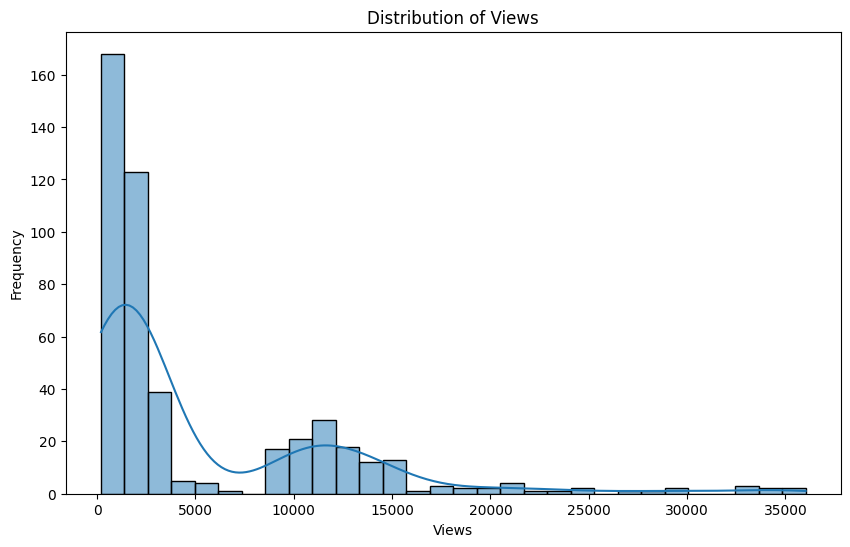

In [8]:
#distribution of views
plot_views_distribution(df)

d:\Kifya_training\Week 7\EthioMart-Amharic-NER-System\src\visualization.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date')['id'].resample('M').count().plot()


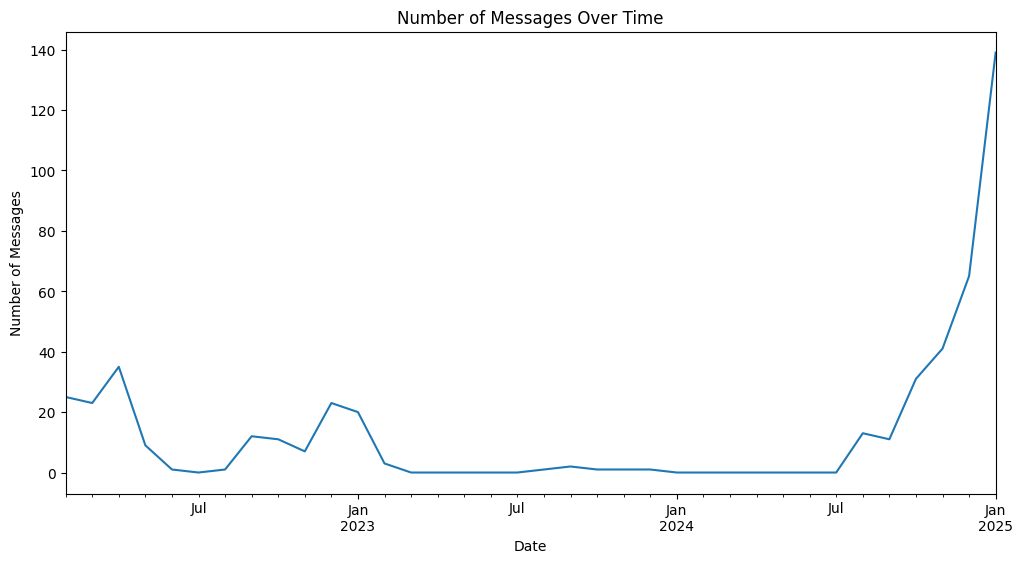

In [9]:
#messages over time
plot_messages_over_time(df)

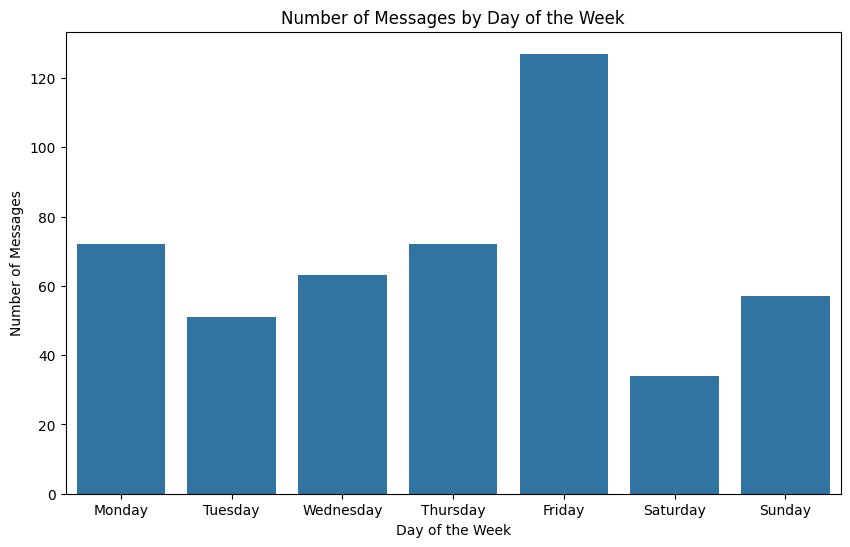

In [10]:
#messages by day
plot_messages_by_day(df)

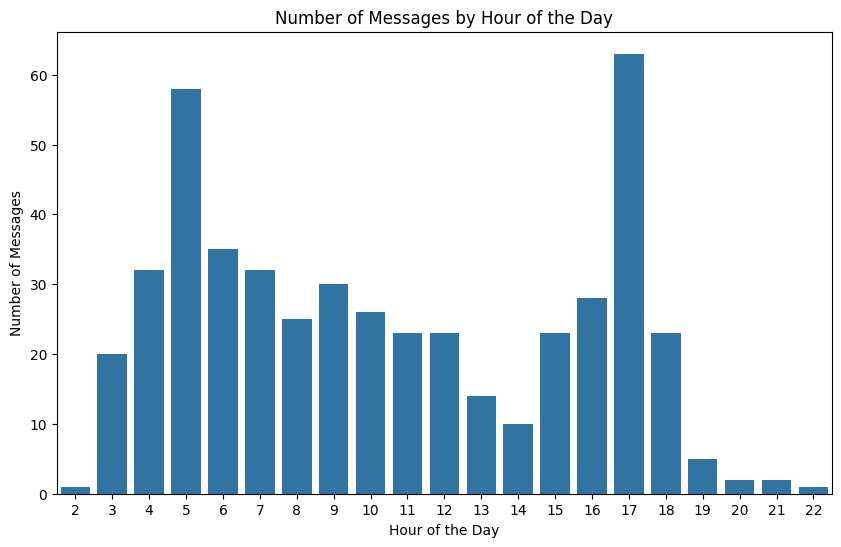

In [11]:
#messages by hour
plot_messages_by_hour(df)

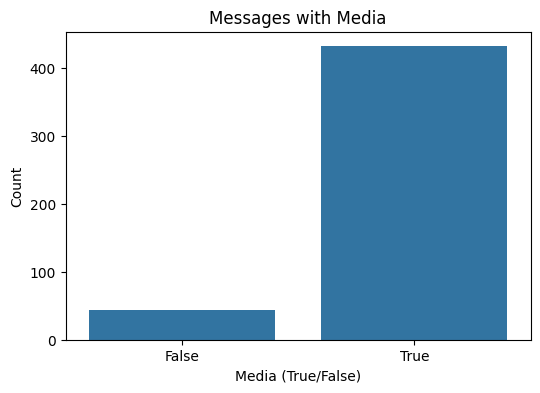

In [12]:
#messages with media
plot_messages_with_media(df)

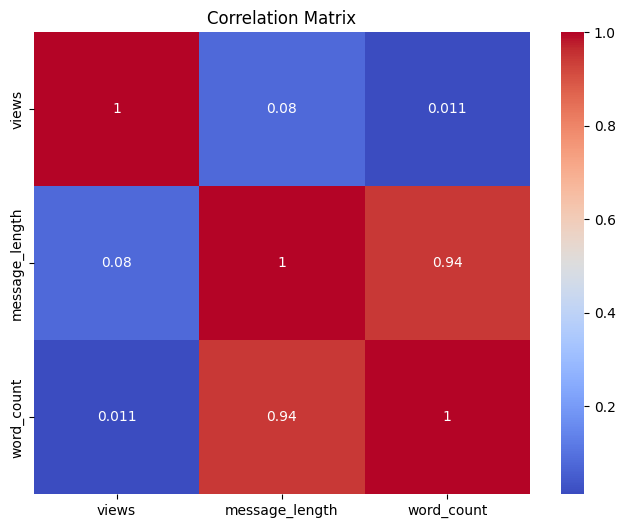

In [13]:
#correlation matrix
plot_correlation_matrix(df)